# Avance Proyecto 1: Análisis exploratorio

### Cantidad de compras registradas por la tienda:

In [567]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar archivo
df = pd.read_csv("../datasets/customer_purchases/customer_purchases_train.csv")

# Total de compras
total_ventas = len(df)
print(f"Total de ventas registradas: {total_ventas}")

Total de ventas registradas: 7289


### Cantidad de clientes:

In [568]:
# Contar IDs únicos de clientes
unique_customers = df['customer_id'].nunique()
print(f"Cantidad de clientes únicos: {unique_customers}")

Cantidad de clientes únicos: 500


### Cantidad de items:

In [569]:
# Contar IDs únicos de items
unique_items = df['item_id'].nunique()
print(f"Cantidad de items únicos: {unique_items}")

Cantidad de items únicos: 384


### Edad de los clientes:

EDADES DE LOS USUARIOS:
Edad mínima: 18 años
Edad máxima: 74 años
Edad promedio: 41.0 años
Edad mediana: 40.5 años


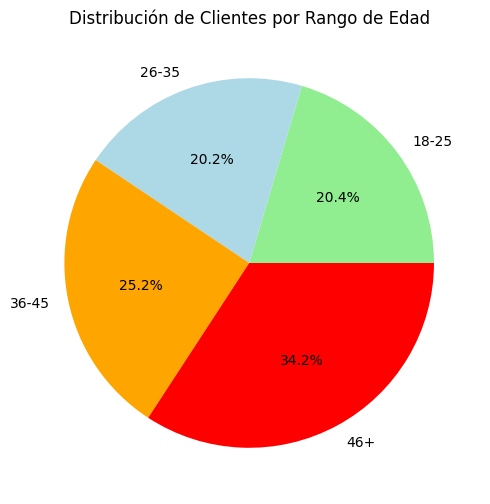


Agregado a 'customer_profile.csv'


In [570]:
# Base con clientes únicos
customer_profile = pd.DataFrame(df['customer_id'].unique(), columns=['customer_id'])

# Convertir customer_id a numérico (extraer solo los números)
customer_profile['customer_id'] = customer_profile['customer_id'].str.extract('(\d+)').astype(int)

# Total de compras
customer_freq = df['customer_id'].value_counts().reset_index()
customer_freq.columns = ['customer_id','total_compras']
# También convertir el customer_id en customer_freq
customer_freq['customer_id'] = customer_freq['customer_id'].str.extract('(\d+)').astype(int)
customer_profile = customer_profile.merge(customer_freq, on='customer_id', how='left')

# Edad (numérica)
ref_date = pd.to_datetime("2025-09-21")
df['edad'] = (ref_date - pd.to_datetime(df['customer_date_of_birth'])).dt.days // 365
# Extraer solo números del customer_id en el dataframe original para el merge
df['customer_id_num'] = df['customer_id'].str.extract('(\d+)').astype(int)
customer_ages = df.groupby('customer_id_num')['edad'].first().reset_index()
customer_ages.columns = ['customer_id', 'edad']
customer_profile = customer_profile.merge(customer_ages, on='customer_id', how='left')

print("EDADES DE LOS USUARIOS:")
print(f"Edad mínima: {customer_ages['edad'].min()} años")
print(f"Edad máxima: {customer_ages['edad'].max()} años")
print(f"Edad promedio: {customer_ages['edad'].mean():.1f} años")
print(f"Edad mediana: {customer_ages['edad'].median()} años")

# Segmentación por rangos (SOLO PARA GRÁFICA)
rangos = {'18-25': (18,25), '26-35': (26,35), '36-45': (36,45), '46+': (46,100)}
segmentos_edad = {}
for rango, (min_e, max_e) in rangos.items():
    if rango == '46+':
        clientes = customer_ages['edad'][customer_ages['edad'] >= min_e]
    else:
        clientes = customer_ages['edad'][(customer_ages['edad'] >= min_e) & (customer_ages['edad'] <= max_e)]
    segmentos_edad[rango] = len(clientes)

# Gráfico (ORIGINAL)
plt.figure(figsize=(6,6))
plt.pie(segmentos_edad.values(), labels=segmentos_edad.keys(), autopct='%1.1f%%',
        colors=['lightgreen','lightblue','orange','red'])
plt.title('Distribución de Clientes por Rango de Edad')
plt.show()

# Guardar CSV (NUMÉRICO)
customer_profile.to_csv("customer_profile.csv", index=False)
print("\nAgregado a 'customer_profile.csv'")

### Género de los clientes:

SEGMENTACIÓN POR GÉNERO:
female: 2878 clientes
male: 2860 clientes
No specified: 1551 clientes


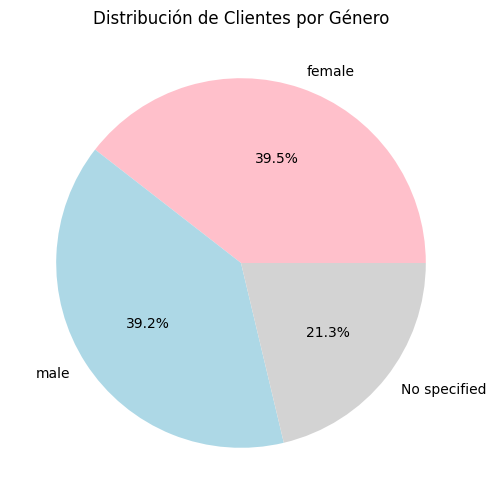


Agregado a 'customer_profile.csv'


In [571]:
# Mapeo numérico para género
gender_mapping = {'male': 0, 'female': 1, 'No specified': 2}
df['customer_gender'] = df['customer_gender'].fillna('No specified')

# Convertir customer_id en df a numérico para hacer el merge
df['customer_id_num'] = df['customer_id'].str.extract('(\d+)').astype(int)

customer_genders = df.groupby('customer_id_num')['customer_gender'].first().map(gender_mapping).reset_index()
customer_genders.columns = ['customer_id', 'gender_code']

customer_profile = customer_profile.merge(customer_genders, on='customer_id', how='left')

# Conteo para gráfica (ORIGINAL)
genero_counts = df['customer_gender'].value_counts()

print("SEGMENTACIÓN POR GÉNERO:")
for genero, cantidad in genero_counts.items():
    print(f"{genero}: {cantidad} clientes")

# Gráfico (ORIGINAL)
plt.figure(figsize=(6,6))
plt.pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%',
        colors=['pink','lightblue','lightgray'])
plt.title('Distribución de Clientes por Género')
plt.show()

# Guardar CSV (NUMÉRICO)
customer_profile.to_csv("customer_profile.csv", index=False)
print("\nAgregado a 'customer_profile.csv'")

### Clientes con múltiples compras:

SEGMENTACIÓN DE CLIENTES (cada 5 compras):
1-5 compras: 9 clientes
6-10 compras: 106 clientes
11-15 compras: 189 clientes
16-20 compras: 123 clientes
21-25 compras: 58 clientes
26-30 compras: 13 clientes
31-35 compras: 2 clientes


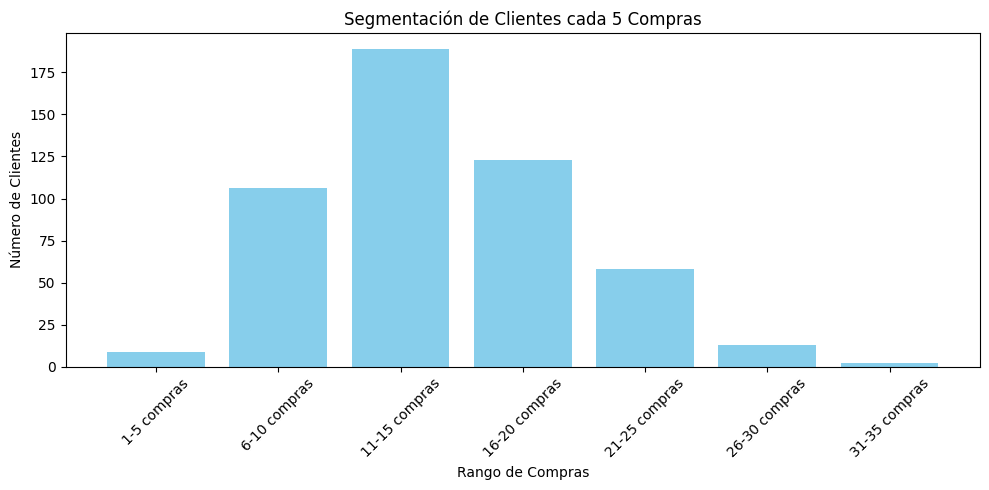


Agregado a 'customer_profile.csv'


In [572]:
# Recalcular total_compras limpio
customer_profile = customer_profile.drop(columns=[c for c in customer_profile.columns if c.startswith('total_compras')], errors='ignore')

# Convertir customer_id en df a numérico para el value_counts
df['customer_id_num'] = df['customer_id'].str.extract('(\d+)').astype(int)
customer_freq = df['customer_id_num'].value_counts().reset_index()
customer_freq.columns = ['customer_id','total_compras']

customer_profile = customer_profile.merge(customer_freq, on='customer_id', how='left')
customer_profile['total_compras'] = customer_profile['total_compras'].fillna(0).astype(int)

# Segmentación cada 5 compras (PARA GRÁFICA)
segmentos_para_grafico = {}
m = int(customer_profile['total_compras'].max())
for i in range(1, m + 1, 5):
    seg_min, seg_max = i, i + 4
    seg_name = f'{seg_min}-{seg_max} compras'
    n = ((customer_profile['total_compras'] >= seg_min) & (customer_profile['total_compras'] <= seg_max)).sum()
    if n > 0:
        segmentos_para_grafico[seg_name] = int(n)

print("SEGMENTACIÓN DE CLIENTES (cada 5 compras):")
for seg, cant in segmentos_para_grafico.items():
    print(f"{seg}: {cant} clientes")

# Gráfico (ORIGINAL)
plt.figure(figsize=(10,5))
plt.bar(list(segmentos_para_grafico.keys()), list(segmentos_para_grafico.values()), color='skyblue')
plt.title('Segmentación de Clientes cada 5 Compras')
plt.xlabel('Rango de Compras')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Guardar CSV (NUMÉRICO)
customer_profile.to_csv("customer_profile.csv", index=False)
print("\nAgregado a 'customer_profile.csv'")

### Promedio de gasto por usuario:

PROMEDIO DE GASTO POR USUARIO:
Gasto promedio mínimo: $350.71
Gasto promedio máximo: $2607.73
Gasto promedio general: $1228.63
Gasto promedio mediano: $1256.74


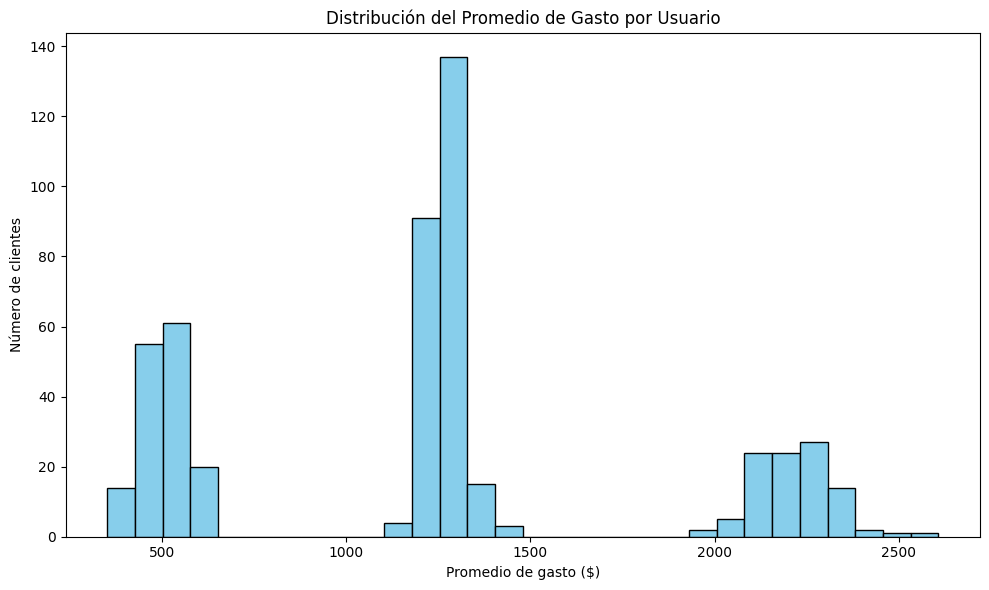


Agregado a 'customer_profile.csv'


In [573]:
# Gasto promedio por cliente (NUMÉRICO)
# Usar la versión numérica del customer_id
df['customer_id_num'] = df['customer_id'].str.extract('(\d+)').astype(int)
avg_spending = (df.groupby('customer_id_num')['item_price']
                  .mean().reset_index()
                  .rename(columns={'item_price':'gasto_promedio', 'customer_id_num': 'customer_id'}))

# Unir al perfil
customer_profile = customer_profile.drop(columns=[c for c in customer_profile.columns if c.startswith('gasto_promedio')], errors='ignore')
customer_profile = customer_profile.merge(avg_spending, on='customer_id', how='left')
customer_profile['gasto_promedio'] = customer_profile['gasto_promedio'].fillna(0.0)

# Estadísticas
print("PROMEDIO DE GASTO POR USUARIO:")
print(f"Gasto promedio mínimo: ${customer_profile['gasto_promedio'].min():.2f}")
print(f"Gasto promedio máximo: ${customer_profile['gasto_promedio'].max():.2f}")
print(f"Gasto promedio general: ${customer_profile['gasto_promedio'].mean():.2f}")
print(f"Gasto promedio mediano: ${customer_profile['gasto_promedio'].median():.2f}")

# Gráfico de distribución (ORIGINAL)
plt.figure(figsize=(10,6))
plt.hist(customer_profile['gasto_promedio'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución del Promedio de Gasto por Usuario')
plt.xlabel('Promedio de gasto ($)')
plt.ylabel('Número de clientes')
plt.tight_layout()
plt.show()

# Guardar CSV (NUMÉRICO)
customer_profile.to_csv("customer_profile.csv", index=False)
print("\nAgregado a 'customer_profile.csv'")

### Antigüedad de los clientes:

ANTIGÜEDAD DE LOS CLIENTES:
Antigüedad mínima: 5 días
Antigüedad máxima: 994 días
Antigüedad promedio: 449.4 días
Antigüedad mediana: 418.0 días


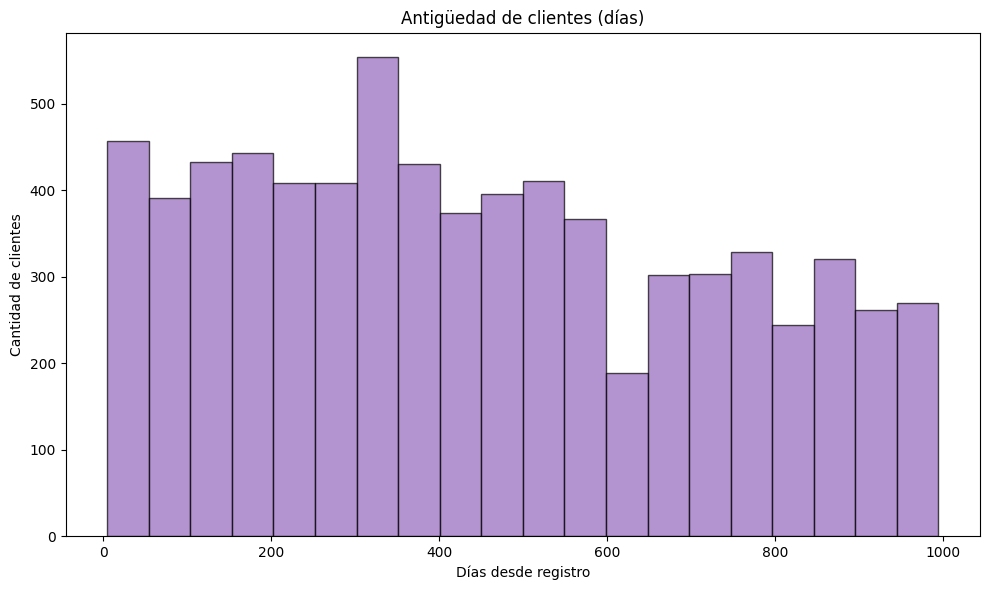


Agregado a 'customer_profile.csv'


In [574]:
# Calcular antigüedad en días al 21/09/2025 (NUMÉRICO)
df['customer_signup_date'] = pd.to_datetime(df['customer_signup_date'])
df['antiguedad_dias'] = (pd.to_datetime('2025-09-21') - df['customer_signup_date']).dt.days

print("ANTIGÜEDAD DE LOS CLIENTES:")
print(f"Antigüedad mínima: {df['antiguedad_dias'].min()} días")
print(f"Antigüedad máxima: {df['antiguedad_dias'].max()} días") 
print(f"Antigüedad promedio: {df['antiguedad_dias'].mean():.1f} días")
print(f"Antigüedad mediana: {df['antiguedad_dias'].median()} días")

# Histograma (ORIGINAL)
plt.figure(figsize=(10,6))
plt.hist(df['antiguedad_dias'], bins=20, color='#9467bd', edgecolor='black', alpha=0.7)
plt.title("Antigüedad de clientes (días)")
plt.xlabel("Días desde registro")
plt.ylabel("Cantidad de clientes")
plt.tight_layout()
plt.show()

# Agregar al perfil de clientes (NUMÉRICO)
# Usar la versión numérica del customer_id
df['customer_id_num'] = df['customer_id'].str.extract('(\d+)').astype(int)
antiguedad = df.groupby('customer_id_num')['antiguedad_dias'].first().reset_index()
antiguedad.columns = ['customer_id', 'antiguedad_dias']

customer_profile = customer_profile.drop(columns=[c for c in customer_profile.columns if c.startswith('antiguedad_dias')], errors='ignore')
customer_profile = customer_profile.merge(antiguedad, on='customer_id', how='left')
customer_profile['antiguedad_dias'] = customer_profile['antiguedad_dias'].fillna(0).astype(int)

customer_profile.to_csv("customer_profile.csv", index=False)
print("\nAgregado a 'customer_profile.csv'")

### Antiguedad VS numero de compras:

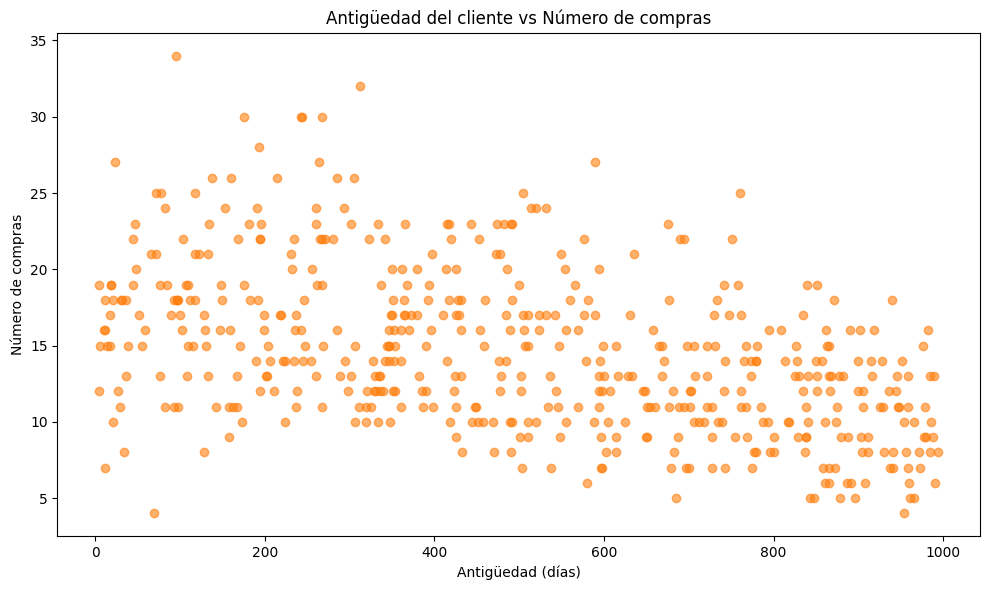

In [575]:
# Solo para la gráfica (usa columnas ya guardadas si tienes customer_profile cargado)
num_compras = customer_profile['total_compras']
antig = customer_profile['antiguedad_dias']

plt.figure(figsize=(10,6))
plt.scatter(antig, num_compras, alpha=0.6, color='#ff7f0e')
plt.title("Antigüedad del cliente vs Número de compras")
plt.xlabel("Antigüedad (días)")
plt.ylabel("Número de compras")
plt.tight_layout()
plt.show()

### Categorias más compradas:

Mapeo de categorías:
  dress: 0
  blouse: 1
  skirt: 2
  jacket: 3
  shoes: 4
  jeans: 5
  t-shirt: 6
  shirt: 7
  slacks: 8
  suit: 9
CATEGORÍAS MÁS COMPRADAS:
item_category
shoes     1504
jeans     1029
blouse     926
slacks     676
dress      670
Name: count, dtype: int64


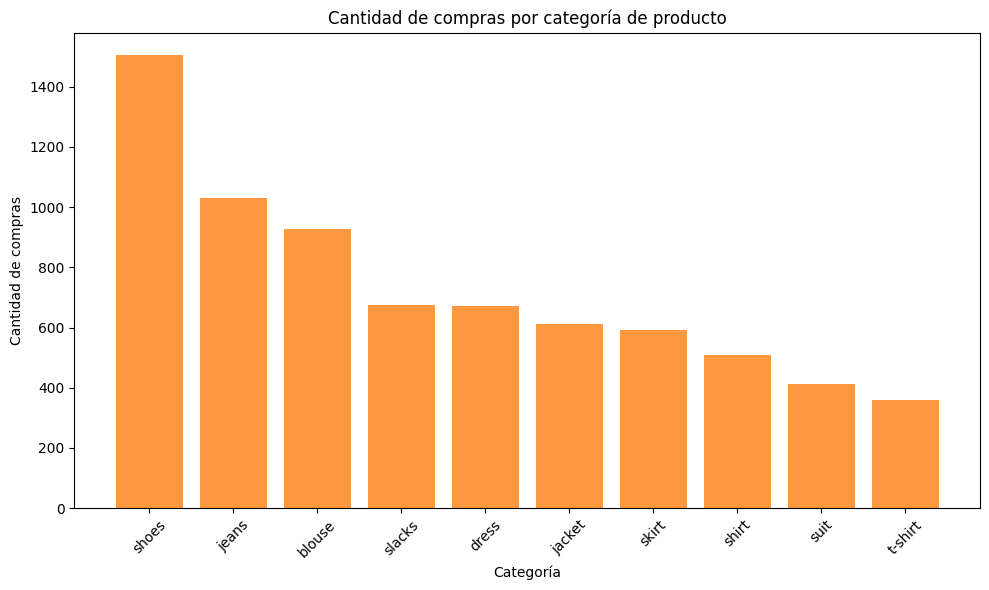


Agregado a 'customer_profile.csv'


In [576]:
categorias_unicas = df['item_category'].unique()
categoria_mapping = {cat: idx for idx, cat in enumerate(categorias_unicas)}
print("Mapeo de categorías:")
for cat, code in categoria_mapping.items():
    print(f"  {cat}: {code}")

# Conteo de categorías más compradas (PARA GRÁFICA)
cat_counts = df['item_category'].value_counts()

print("CATEGORÍAS MÁS COMPRADAS:")
print(cat_counts.head())

# Gráfico (ORIGINAL)
plt.figure(figsize=(10,6))
plt.bar(cat_counts.index, cat_counts.values, color='#ff7f0e', alpha=0.8)
plt.title("Cantidad de compras por categoría de producto")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de compras")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Agregar al perfil: categoría más frecuente por cliente (NUMÉRICO)
df['category_code'] = df['item_category'].map(categoria_mapping)
# Usar la versión numérica del customer_id
df['customer_id_num'] = df['customer_id'].str.extract('(\d+)').astype(int)
cat_cliente = df.groupby('customer_id_num')['category_code'].agg(lambda x: x.mode()[0] if not x.mode().empty else -1).reset_index()
cat_cliente.columns = ['customer_id','categoria_frecuente_code']

customer_profile = customer_profile.drop(columns=[c for c in customer_profile.columns if c.startswith('categoria_frecuente_code')], errors='ignore')
customer_profile = customer_profile.merge(cat_cliente, on='customer_id', how='left')
customer_profile['categoria_frecuente_code'] = customer_profile['categoria_frecuente_code'].fillna(-1).astype(int)

customer_profile.to_csv("customer_profile.csv", index=False)
print("\nAgregado a 'customer_profile.csv'")

### Promedio de compras por categoría:

PROMEDIO DE COMPRAS POR CATEGORÍA (todos los clientes):
item_category
blouse     1.85
dress      1.34
jacket     1.23
jeans      2.06
shirt      1.01
shoes      3.01
skirt      1.18
slacks     1.35
suit       0.82
t-shirt    0.72
dtype: float64


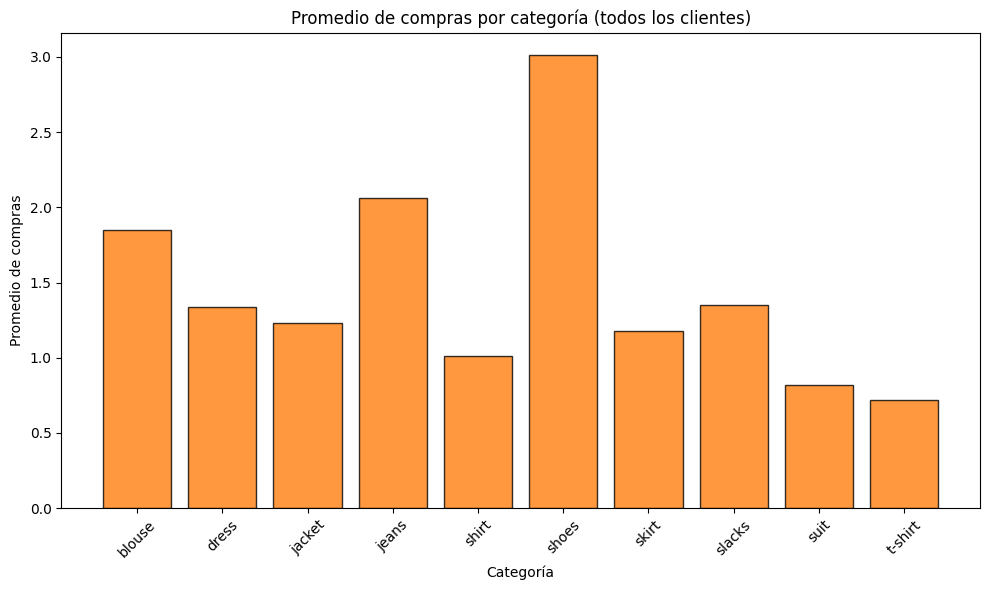

In [577]:
cliente_tipo = df.pivot_table(index='customer_id', columns='item_category',
                              values='purchase_id', aggfunc='count', fill_value=0)

# Promedio general por categoría
promedios_general = cliente_tipo.mean().round(2)
print("PROMEDIO DE COMPRAS POR CATEGORÍA (todos los clientes):")
print(promedios_general)

# Gráfico del promedio general (ORIGINAL)
plt.figure(figsize=(10,6))
plt.bar(promedios_general.index, promedios_general.values, color='#ff7f0e', alpha=0.8, edgecolor='black')
plt.title("Promedio de compras por categoría (todos los clientes)")
plt.xlabel("Categoría")
plt.ylabel("Promedio de compras")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Relación de color de acuerdo al género:

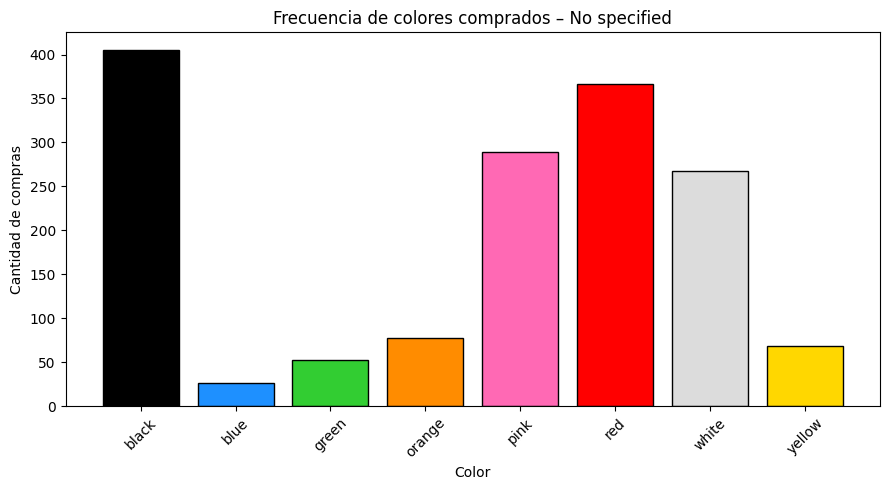

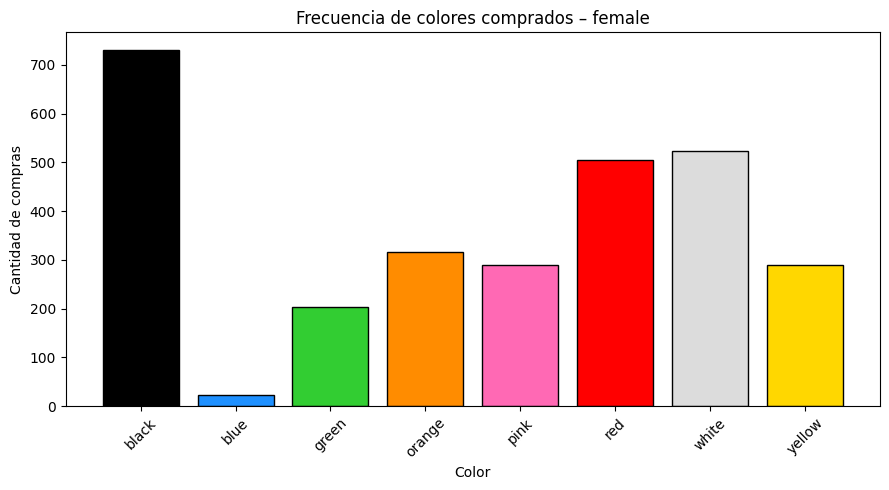

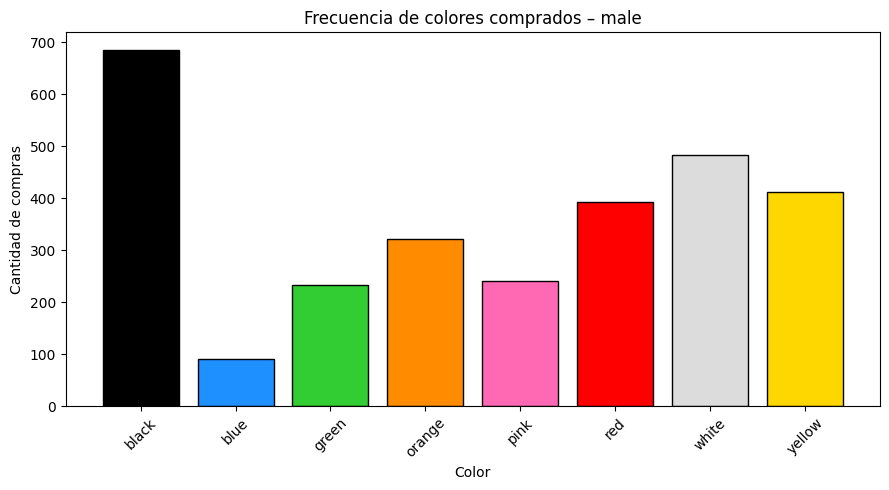


Agregado a 'customer_profile.csv'


In [578]:
# normalizar género
df['customer_gender'] = df['customer_gender'].fillna('No specified')

# mapeo de tags a colores
color_map = {
    "imgy": "yellow",
    "imgb": "blue", 
    "imgbl": "black",
    "imgg": "green",
    "imgo": "orange",
    "imgp": "pink",
    "imgr": "red",
    "imgw": "white"
}

# extraer tag y mapear al nombre del color
df['item_color_tag'] = df['item_img_filename'].str.replace('.jpg','',regex=False)
df['item_color'] = df['item_color_tag'].map(color_map).fillna('other')

# conteo de colores por género
color_counts = df.groupby(['customer_gender','item_color']).size().unstack(fill_value=0)

# colores reales para graficar
palette = {
    "yellow":"#FFD700",
    "blue":"#1E90FF",
    "black":"#000000",
    "green":"#32CD32",
    "orange":"#FF8C00",
    "pink":"#FF69B4",
    "red":"#FF0000",
    "white":"#DCDCDC",
    "other":"#A9A9A9"
}

# graficar por género
for g in color_counts.index:
    plt.figure(figsize=(9,5))
    bars = plt.bar(color_counts.columns, color_counts.loc[g].values,
                   edgecolor='black',
                   color=[palette.get(c,"#A9A9A9") for c in color_counts.columns])
    plt.title(f'Frecuencia de colores comprados – {g}')
    plt.xlabel('Color')
    plt.ylabel('Cantidad de compras')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# --- agregar al CSV (SOLO NUMÉRICO) ---
# Usar la versión numérica del customer_id
df['customer_id_num'] = df['customer_id'].str.extract('(\d+)').astype(int)
by_customer = df.pivot_table(index='customer_id_num', columns='item_color',
                             values='purchase_id', aggfunc='count', fill_value=0)

# Mapeo numérico para nombres de columnas de color
color_name_mapping = {
    'yellow': 'color_yellow_count',
    'blue': 'color_blue_count', 
    'black': 'color_black_count',
    'green': 'color_green_count',
    'orange': 'color_orange_count',
    'pink': 'color_pink_count',
    'red': 'color_red_count',
    'white': 'color_white_count',
    'other': 'color_other_count'
}

# Renombrar columnas a formato numérico
by_customer = by_customer.rename(columns=color_name_mapping)

# unir con customer_profile
if 'customer_profile' not in globals():
    customer_profile = pd.DataFrame(df['customer_id_num'].unique(), columns=['customer_id'])

cols_to_drop = [c for c in by_customer.columns if c in customer_profile.columns]
customer_profile = customer_profile.drop(columns=cols_to_drop, errors='ignore')

# Reset index y renombrar la columna del índice
by_customer_reset = by_customer.reset_index()
by_customer_reset = by_customer_reset.rename(columns={'customer_id_num': 'customer_id'})

customer_profile = customer_profile.merge(by_customer_reset, on='customer_id', how='left')

# rellenar vacíos con 0 (todos numéricos)
for c in by_customer.columns:
    customer_profile[c] = customer_profile[c].fillna(0).astype(int)

customer_profile.to_csv("customer_profile.csv", index=False)
print("\nAgregado a 'customer_profile.csv'")

### Relación de color de acuerdo a la edad:

/var/folders/gk/jkm08ww56v5bgfzyy9xr348m0000gn/T/ipykernel_788/1764079926.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_color = df.groupby(['age_group','item_color']).size().unstack(fill_value=0)


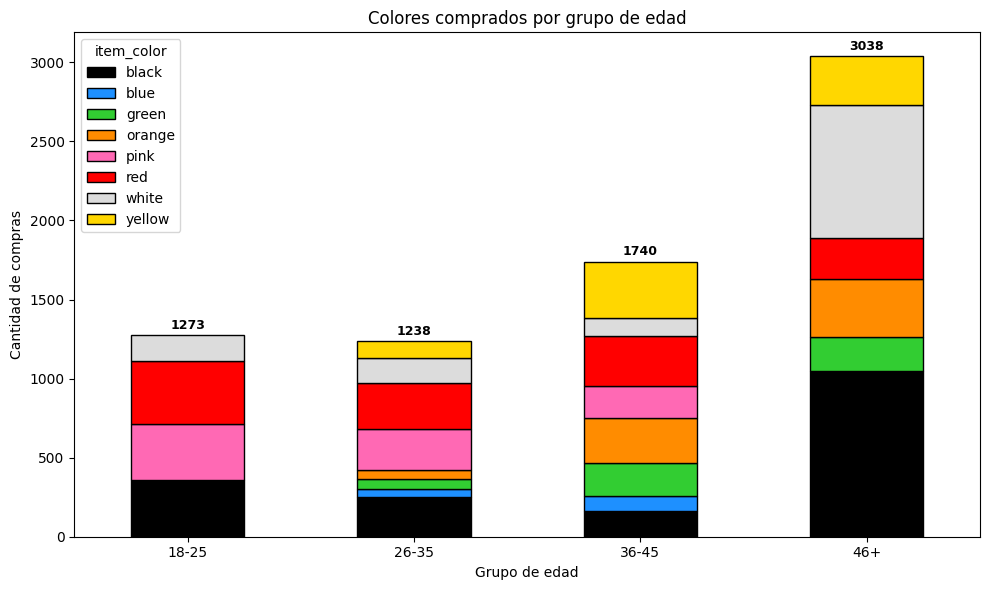

In [579]:
color_map = {"imgy":"yellow","imgb":"blue","imgbl":"black","imgg":"green",
             "imgo":"orange","imgp":"pink","imgr":"red","imgw":"white"}
palette   = {"yellow":"#FFD700","blue":"#1E90FF","black":"#000000","green":"#32CD32",
             "orange":"#FF8C00","pink":"#FF69B4","red":"#FF0000","white":"#DCDCDC"}

df['item_color'] = df['item_img_filename'].str.replace('.jpg','',regex=False).map(color_map).fillna('other')

# edad y grupos
ref = pd.to_datetime("2025-09-21")
df['customer_date_of_birth'] = pd.to_datetime(df['customer_date_of_birth'], errors='coerce')
df['edad'] = ((ref - df['customer_date_of_birth']).dt.days // 365).clip(lower=0)

bins = [0,25,35,45,200]
labels = ['18-25','26-35','36-45','46+']
df['age_group'] = pd.cut(df['edad'].fillna(0), bins=bins, labels=labels, right=True, include_lowest=True)

# tabla: conteo por grupo de edad y color
age_color = df.groupby(['age_group','item_color']).size().unstack(fill_value=0)

# gráfico de barras apiladas (conteos) - ORIGINAL
ax = age_color.reindex(labels).plot(
    kind='bar', stacked=True, figsize=(10,6),
    color=[palette.get(c, "#A9A9A9") for c in age_color.columns], edgecolor='black'
)
plt.title("Colores comprados por grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Cantidad de compras")
plt.xticks(rotation=0)

# totales arriba de cada barra
for i, total in enumerate(age_color.sum(axis=1)):
    plt.text(i, total + 20, str(total), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### Compras con rating:

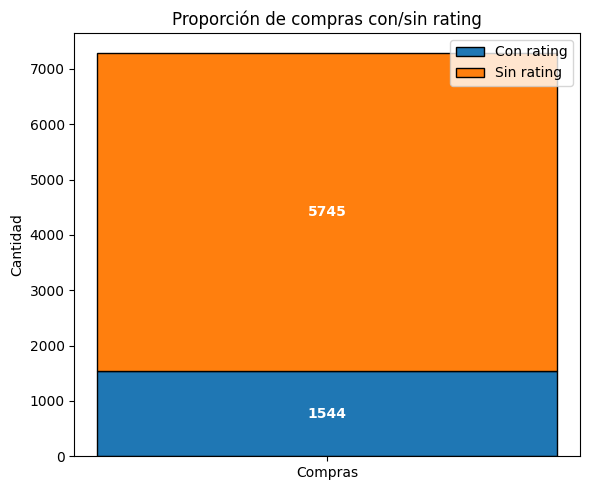

In [580]:
# Totales globales
totales = len(df)
con_rating = int(df['purchase_item_rating'].notna().sum())
sin_rating = totales - con_rating

# Barra apilada con valores (ORIGINAL)
plt.figure(figsize=(6,5))
plt.bar(['Compras'], [con_rating], label='Con rating', edgecolor='black', color='#1f77b4')
plt.bar(['Compras'], [sin_rating], bottom=[con_rating], label='Sin rating', edgecolor='black', color='#ff7f0e')

# Etiquetas con valores
plt.text(0, con_rating/2, str(con_rating), ha='center', va='center', color='white', fontweight='bold')
plt.text(0, con_rating + sin_rating/2, str(sin_rating), ha='center', va='center', color='white', fontweight='bold')

plt.title('Proporción de compras con/sin rating')
plt.ylabel('Cantidad')
plt.legend()
plt.tight_layout()
plt.show()

### Frecuencia de modalidad de compra:

FRECUENCIA DE COMPRAS POR DISPOSITIVO:
purchase_device
mobile     3653
desktop    3636
Name: count, dtype: int64


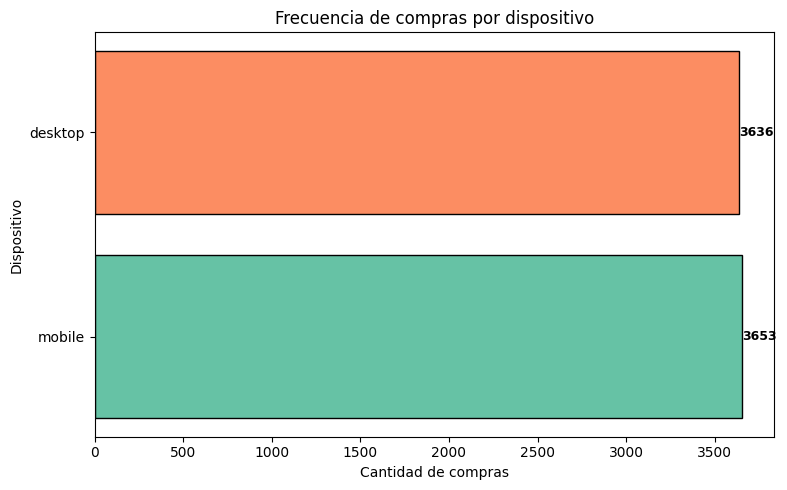


Agregado a 'customer_profile.csv'


In [581]:
# Mapeo numérico para dispositivos
device_mapping = {'mobile': 0, 'desktop': 1, 'No specified': 2}
df['purchase_device'] = df['purchase_device'].fillna('No specified')

# Frecuencia de dispositivos (PARA GRÁFICA)
device_counts = df['purchase_device'].value_counts()

print("FRECUENCIA DE COMPRAS POR DISPOSITIVO:")
print(device_counts)

# Barh con etiquetas (ORIGINAL)
plt.figure(figsize=(8,5))
bars = plt.barh(device_counts.index, device_counts.values, color=plt.cm.Set2.colors, edgecolor='black')

for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2,
             str(bar.get_width()), va='center', fontsize=9, fontweight='bold')

plt.title("Frecuencia de compras por dispositivo")
plt.xlabel("Cantidad de compras")
plt.ylabel("Dispositivo")
plt.tight_layout()
plt.show()

# --- Dispositivo más frecuente por cliente (NUMÉRICO) ---
df['device_code'] = df['purchase_device'].map(device_mapping)

# Usar la versión numérica del customer_id
df['customer_id_num'] = df['customer_id'].str.extract('(\d+)').astype(int)
device_cliente = df.groupby('customer_id_num')['device_code'].agg(
    lambda x: x.mode()[0] if not x.mode().empty else 2
).reset_index()
device_cliente.columns = ['customer_id','device_frecuente_code']

# Actualizar CSV con columna device_frecuente_code
customer_profile = customer_profile.drop(columns=[c for c in ['device_frecuente_code'] if c in customer_profile.columns], errors='ignore')
customer_profile = customer_profile.merge(device_cliente, on='customer_id', how='left')
customer_profile['device_frecuente_code'] = customer_profile['device_frecuente_code'].fillna(2).astype(int)

customer_profile.to_csv("customer_profile.csv", index=False)
print("\nAgregado a 'customer_profile.csv'")

### Compras por rango de precios items:

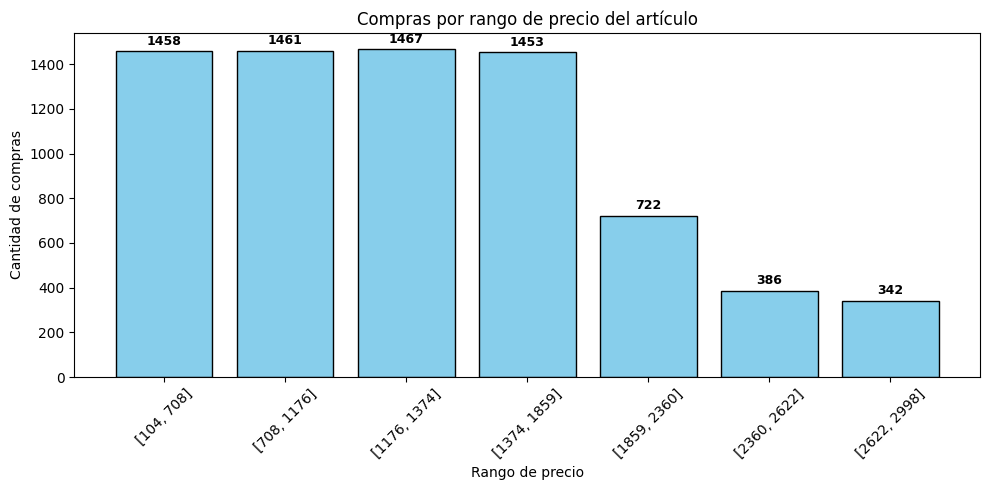

Agregado a 'customer_profile.csv'


In [582]:
# asegurar numérico
df['item_price'] = pd.to_numeric(df['item_price'], errors='coerce')

# bins de precios (PARA GRÁFICA)
qs = [0, .2, .4, .6, .8, .9, .95, 1.0]
cuts = df['item_price'].quantile(qs).drop_duplicates().values
if len(cuts) < 3:
    cuts = np.unique(np.percentile(df['item_price'].dropna(), [0,25,50,75,90,95,100]))
labels = [f"[{int(cuts[i])}, {int(cuts[i+1])}]" for i in range(len(cuts)-1)]
df['price_bin'] = pd.cut(df['item_price'], bins=cuts, include_lowest=True, labels=labels)

# conteo total de compras por rango (PARA GRÁFICA)
bin_counts = df['price_bin'].value_counts().reindex(labels, fill_value=0)

# --- gráfica (ORIGINAL) ---
plt.figure(figsize=(10,5))
bars = plt.bar(bin_counts.index.astype(str), bin_counts.values, edgecolor='black', color="skyblue")
for b in bars:
    y = b.get_height()
    plt.text(b.get_x()+b.get_width()/2, y+max(1, bin_counts.max()*0.01), str(int(y)),
             ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.title("Compras por rango de precio del artículo")
plt.xlabel("Rango de precio")
plt.ylabel("Cantidad de compras")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- métricas por cliente (NUMÉRICO) ---
# Bins de precios simplificados para CSV
price_bins_simple = [0, 1000, 1200, 1400, 1600, 1800, 2000, df['item_price'].max()]
price_labels_simple = list(range(len(price_bins_simple)-1))

df['price_bin_code'] = pd.cut(df['item_price'], bins=price_bins_simple, labels=price_labels_simple, include_lowest=True)

# Usar la versión numérica del customer_id
df['customer_id_num'] = df['customer_id'].str.extract('(\d+)').astype(int)

# rango preferido (numérico)
pref_bin = df.dropna(subset=['price_bin_code']).groupby('customer_id_num')['price_bin_code'].agg(
    lambda s: s.mode()[0] if not s.mode().empty else -1
).reset_index()
pref_bin.columns = ['customer_id','preferred_price_bin_code']
pref_bin['preferred_price_bin_code'] = pref_bin['preferred_price_bin_code'].astype(int)

# precios máximo y mínimo (numéricos) - SIN PROMEDIO
price_stats = (df.groupby('customer_id_num')['item_price']
                 .agg(max_item_price='max', min_item_price='min')  # Eliminado 'avg_item_price'
                 .reset_index())
price_stats.columns = ['customer_id', 'max_item_price', 'min_item_price']

# merge con el perfil
customer_profile = customer_profile.drop(columns=[c for c in ['preferred_price_bin_code','avg_item_price','max_item_price','min_item_price'] if c in customer_profile.columns], errors='ignore')
customer_profile = (customer_profile
                    .merge(pref_bin, on='customer_id', how='left')
                    .merge(price_stats, on='customer_id', how='left'))

# limpiar vacíos
customer_profile['preferred_price_bin_code'] = customer_profile['preferred_price_bin_code'].fillna(-1).astype(int)
# Eliminada la línea del promedio
customer_profile['max_item_price'] = customer_profile['max_item_price'].fillna(0).round(2)
customer_profile['min_item_price'] = customer_profile['min_item_price'].fillna(0).round(2)

# guardar csv
customer_profile.to_csv("customer_profile.csv", index=False)
print("Agregado a 'customer_profile.csv'")

### Compras realizadas mensualmente en la tienda:

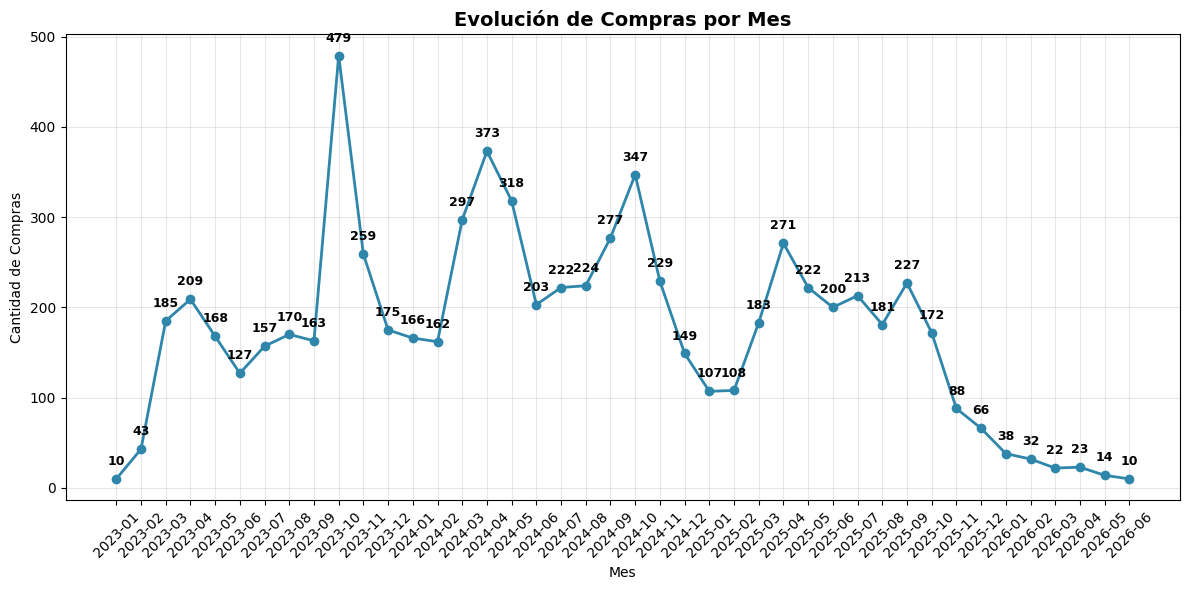


ESTADÍSTICAS DE COMPRAS POR MES:
Mes con más compras: 2023-10 (479 compras)
Mes con menos compras: 2023-01 (10 compras)
Promedio mensual: 173.5 compras
Total de compras en el período: 7289 compras


In [583]:
# Convertir la fecha de compra a datetime
df['purchase_timestamp'] = pd.to_datetime(df['purchase_timestamp'])

# Extraer año y mes
df['año_mes'] = df['purchase_timestamp'].dt.to_period('M')

# Contar compras por mes
compras_por_mes = df['año_mes'].value_counts().sort_index()

# Convertir a formato string para mejor visualización
compras_por_mes.index = compras_por_mes.index.astype(str)

# Gráfico de compras por mes
plt.figure(figsize=(12, 6))
plt.plot(compras_por_mes.index, compras_por_mes.values, marker='o', linewidth=2, markersize=6, color='#2E86AB')
plt.title('Evolución de Compras por Mes', fontsize=14, fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Compras')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Añadir etiquetas con los valores
for i, valor in enumerate(compras_por_mes.values):
    plt.annotate(str(valor), 
                (compras_por_mes.index[i], valor),
                textcoords="offset points",
                xytext=(0,10),
                ha='center',
                fontsize=9,
                fontweight='bold')

plt.tight_layout()
plt.show()

# Estadísticas adicionales
print(f"\nESTADÍSTICAS DE COMPRAS POR MES:")
print(f"Mes con más compras: {compras_por_mes.idxmax()} ({compras_por_mes.max()} compras)")
print(f"Mes con menos compras: {compras_por_mes.idxmin()} ({compras_por_mes.min()} compras)")
print(f"Promedio mensual: {compras_por_mes.mean():.1f} compras")
print(f"Total de compras en el período: {compras_por_mes.sum()} compras")

### Compra tras lanzamiento:

TIEMPO PROMEDIO PARA COMPRAR DESPUÉS DEL LANZAMIENTO:
Tiempo mínimo: 10.1 días
Tiempo máximo: 254.6 días
Tiempo promedio general: 87.6 días
Tiempo mediano: 55.2 días


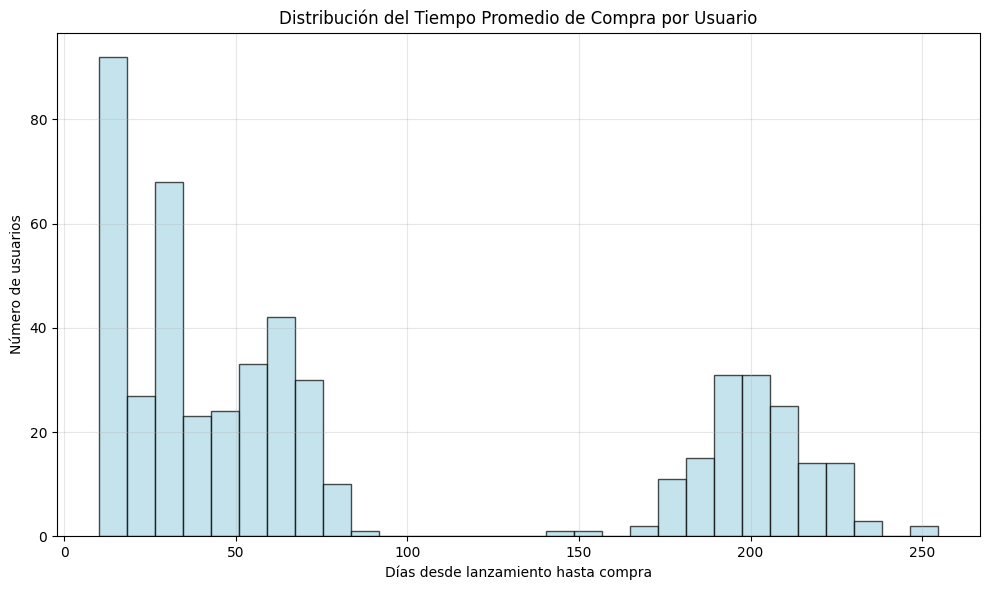

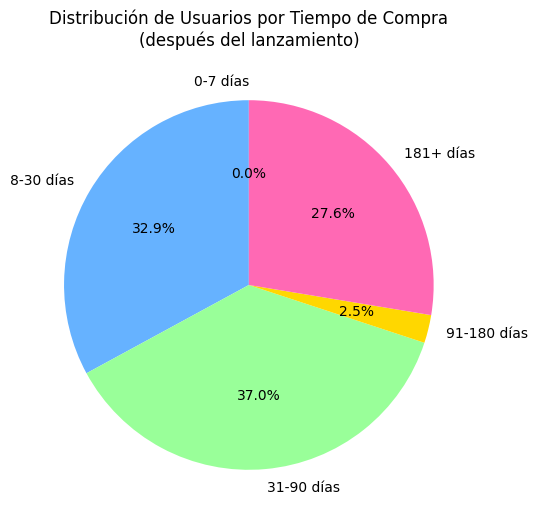


Agregado a 'customer_profile.csv'


In [584]:
# Convertir las fechas a datetime
df['item_release_date'] = pd.to_datetime(df['item_release_date'])
df['purchase_timestamp'] = pd.to_datetime(df['purchase_timestamp'])

# Calcular días entre lanzamiento y compra
df['dias_desde_lanzamiento'] = (df['purchase_timestamp'] - df['item_release_date']).dt.days

# Filtrar valores negativos (compras antes del lanzamiento, si los hay)
df = df[df['dias_desde_lanzamiento'] >= 0]

# Calcular promedio por usuario
tiempo_compra_usuario = df.groupby('customer_id')['dias_desde_lanzamiento'].mean().reset_index()
tiempo_compra_usuario.columns = ['customer_id', 'dias_promedio_compra']

print("TIEMPO PROMEDIO PARA COMPRAR DESPUÉS DEL LANZAMIENTO:")
print(f"Tiempo mínimo: {tiempo_compra_usuario['dias_promedio_compra'].min():.1f} días")
print(f"Tiempo máximo: {tiempo_compra_usuario['dias_promedio_compra'].max():.1f} días")
print(f"Tiempo promedio general: {tiempo_compra_usuario['dias_promedio_compra'].mean():.1f} días")
print(f"Tiempo mediano: {tiempo_compra_usuario['dias_promedio_compra'].median():.1f} días")

# Gráfico 1: Distribución del tiempo promedio por usuario
plt.figure(figsize=(10, 6))
plt.hist(tiempo_compra_usuario['dias_promedio_compra'], bins=30, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Distribución del Tiempo Promedio de Compra por Usuario')
plt.xlabel('Días desde lanzamiento hasta compra')
plt.ylabel('Número de usuarios')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Segmentación por rangos de tiempo
rangos_tiempo = {
    '0-7 días': (0, 7),
    '8-30 días': (8, 30),
    '31-90 días': (31, 90),
    '91-180 días': (91, 180),
    '181+ días': (181, tiempo_compra_usuario['dias_promedio_compra'].max())
}

conteo_rangos = {}
for rango, (min_d, max_d) in rangos_tiempo.items():
    if rango == '181+ días':
        count = len(tiempo_compra_usuario[tiempo_compra_usuario['dias_promedio_compra'] >= min_d])
    else:
        count = len(tiempo_compra_usuario[(tiempo_compra_usuario['dias_promedio_compra'] >= min_d) & 
                                        (tiempo_compra_usuario['dias_promedio_compra'] <= max_d)])
    conteo_rangos[rango] = count

# Gráfico de torta para los rangos
plt.figure(figsize=(10, 6))
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700', '#FF69B4']
plt.pie(conteo_rangos.values(), labels=conteo_rangos.keys(), autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Distribución de Usuarios por Tiempo de Compra\n(después del lanzamiento)')
plt.show()

# Agregar al perfil del cliente (si quieres guardarlo en el CSV)
# Convertir customer_id a numérico para el merge
df['customer_id_num'] = df['customer_id'].str.extract('(\d+)').astype(int)
tiempo_compra_usuario_num = df.groupby('customer_id_num')['dias_desde_lanzamiento'].mean().reset_index()
tiempo_compra_usuario_num.columns = ['customer_id', 'dias_promedio_compra']

# Merge con customer_profile (si existe)
if 'customer_profile' in globals():
    customer_profile = customer_profile.drop(columns=['dias_promedio_compra'], errors='ignore')
    customer_profile = customer_profile.merge(tiempo_compra_usuario_num, on='customer_id', how='left')
    customer_profile['dias_promedio_compra'] = customer_profile['dias_promedio_compra'].fillna(0).round(1)
    
    customer_profile.to_csv("customer_profile.csv", index=False)
    print("\nAgregado a 'customer_profile.csv'")

### Compra de categoría de acuerdo al género:

<Figure size 1200x800 with 0 Axes>

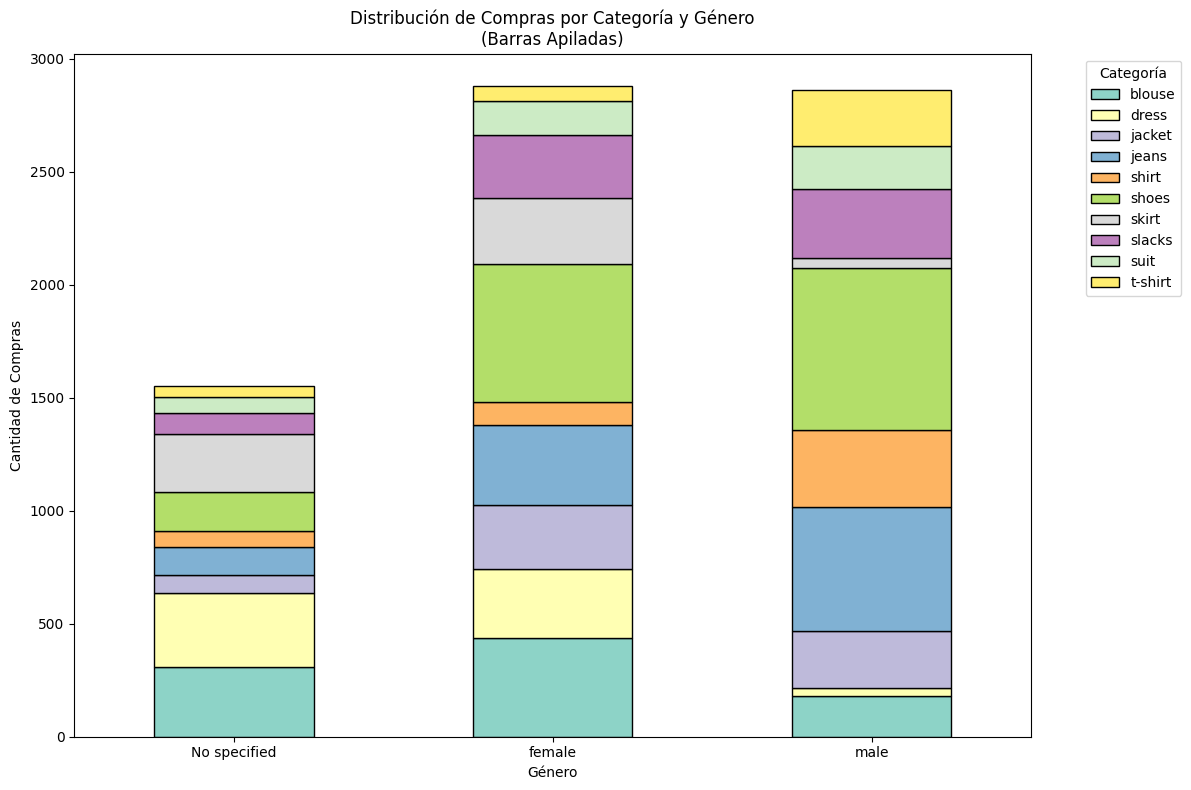

Agregado a 'customer_profile.csv'


In [585]:
# Segmentación de categorías por género
categoria_genero = df.groupby(['customer_gender', 'item_category']).size().unstack(fill_value=0)

# Gráfico: Gráfico de barras apiladas
plt.figure(figsize=(12, 8))
categoria_genero.plot(kind='bar', stacked=True, figsize=(12, 8), 
                      colormap='Set3', edgecolor='black')
plt.title('Distribución de Compras por Categoría y Género\n(Barras Apiladas)')
plt.xlabel('Género')
plt.ylabel('Cantidad de Compras')
plt.xticks(rotation=0)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- AGREGAR CONTEOS DE CATEGORÍAS POR USUARIO AL CSV ---

# Crear pivot table con conteos de categorías por usuario
df['customer_id_num'] = df['customer_id'].str.extract('(\d+)').astype(int)
categorias_por_usuario = df.pivot_table(
    index='customer_id_num', 
    columns='item_category', 
    values='purchase_id', 
    aggfunc='count', 
    fill_value=0
).reset_index()

# Renombrar columnas para mejor formato
categorias_por_usuario.columns.name = None  # Eliminar el nombre de las columnas
categorias_por_usuario = categorias_por_usuario.rename(columns={'customer_id_num': 'customer_id'})

# Renombrar columnas de categorías para evitar problemas
categorias_por_usuario.columns = ['customer_id'] + [f'cat_{col}_count' for col in categorias_por_usuario.columns[1:]]

# Merge con customer_profile
customer_profile = customer_profile.drop(columns=[col for col in categorias_por_usuario.columns if col in customer_profile.columns and col != 'customer_id'], errors='ignore')
customer_profile = customer_profile.merge(categorias_por_usuario, on='customer_id', how='left')

# Rellenar valores nulos con 0
categoria_cols = [col for col in categorias_por_usuario.columns if col != 'customer_id']
for col in categoria_cols:
    customer_profile[col] = customer_profile[col].fillna(0).astype(int)

# Guardar CSV actualizado
customer_profile.to_csv("customer_profile.csv", index=False)

print("Agregado a 'customer_profile.csv'")

### Nombres de artículos vendidos por género:

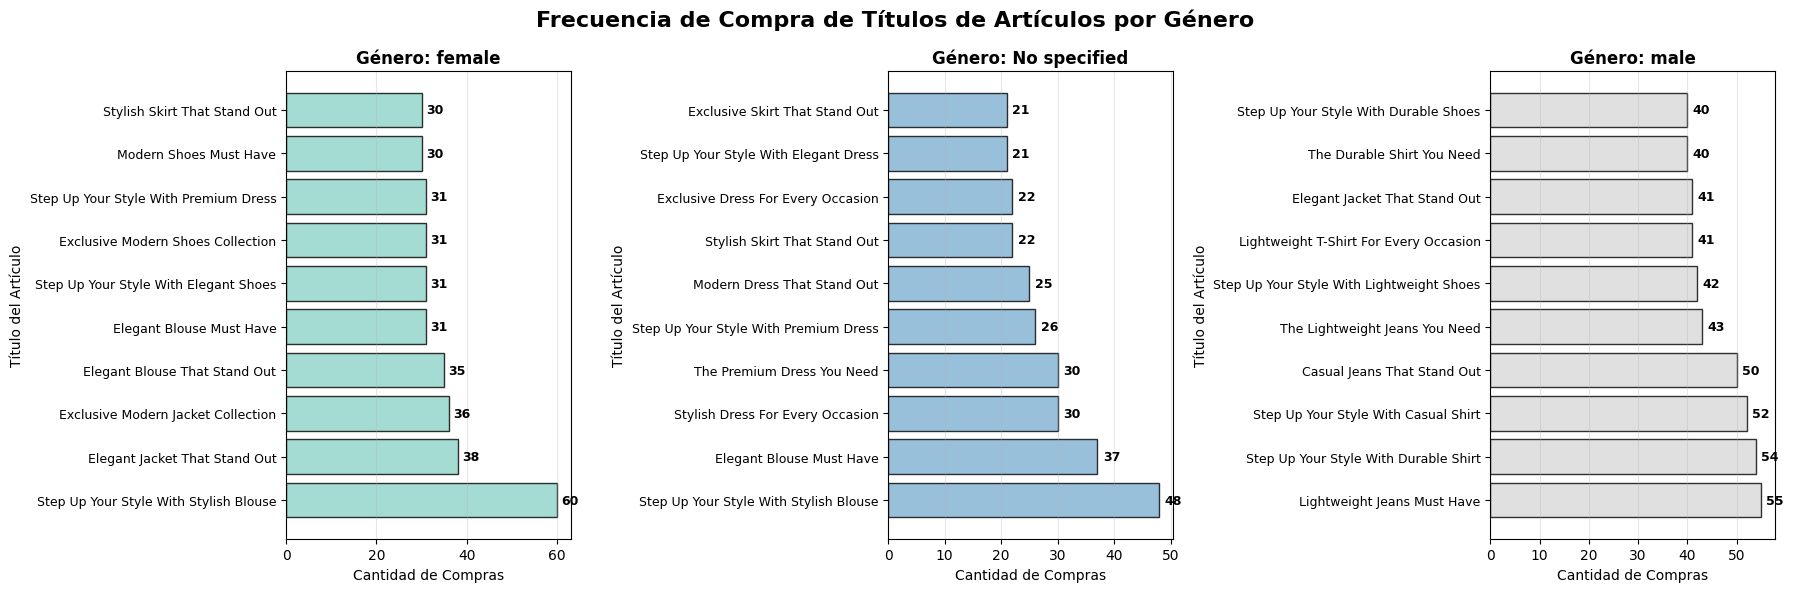

In [586]:
# Obtener los títulos más comprados por género
generos = df['customer_gender'].unique()

# Crear una figura con subgráficas
fig, axes = plt.subplots(1, len(generos), figsize=(18, 6))
fig.suptitle('Frecuencia de Compra de Títulos de Artículos por Género', fontsize=16, fontweight='bold')

for i, genero in enumerate(generos):
    # Filtrar por género
    df_genero = df[df['customer_gender'] == genero]
    
    # Obtener los 10 títulos más comprados
    top_titulos = df_genero['item_title'].value_counts().head(10)
    
    # Crear gráfica de barras
    ax = axes[i] if len(generos) > 1 else axes
    bars = ax.barh(range(len(top_titulos)), top_titulos.values, color=plt.cm.Set3(i/len(generos)), alpha=0.8, edgecolor='black')
    
    ax.set_title(f'Género: {genero}', fontweight='bold')
    ax.set_xlabel('Cantidad de Compras')
    ax.set_ylabel('Título del Artículo')
    ax.set_yticks(range(len(top_titulos)))
    ax.set_yticklabels(top_titulos.index, fontsize=9)
    
    # Añadir etiquetas con los valores
    for j, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width + 1, bar.get_y() + bar.get_height()/2, 
                f'{int(width)}', va='center', fontsize=9, fontweight='bold')
    
    ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()